Model training

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score , classification_report, f1_score, recall_score, precision_score



In [2]:
data = pd.read_csv("data\stud.csv")

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
X = data.drop(columns = ['math_score'], axis=1)
xnew = data.drop(columns = ['math_score'], axis=1)
Y = data['math_score']

In [27]:
xnew.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [28]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [29]:
print("Categories in 'gender' variable:     ",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(data['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(data['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [74]:
data_encoded = pd.get_dummies(xnew)

data_encoded = data_encoded.astype(int)

data_encoded.shape

# scaler  =  StandardScaler()
# data_encoded_scaled = scaler.fit_transform(data_encoded)

# col_names = ['reading_score', 'writing_score']
# features = data_encoded[col_names]
# scaler = StandardScaler().fit(features.values)
# features = scaler.transform(features.values)

(1000, 19)

In [75]:
data_encoded.head()

,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [33]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [23]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [34]:
X = preprocessor.fit_transform(X)


In [35]:
X.shape

(1000, 19)

In [42]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [53]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X ,Y,  train_size =0.8 , random_state=432)

In [56]:
X_train.shape

(800, 19)

In [57]:
X_test.shape

(200, 19)

In [79]:
def model(model, X, y, X_, y_):
  model.fit(X,y)
  y_p = model.predict(X_)
  print(model, 'Mean Abs Error :',mean_absolute_error(y_,y_p),'\n','\t\t\t','Root Mean Square Error :',np.sqrt(mean_squared_error(y_test, prediction1)),'\n','\t\t\t','r2_score :',r2_score(y_,y_p),'\n','\t\t\t',)
  return

In [77]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
import xgboost
from xgboost import XGBRegressor

model1 = XGBRegressor()

model1.fit(X_train,y_train)

prediction1 = model1.predict(X_test)


print('XGB MAE:',mean_absolute_error(y_test, prediction1))
print('XGB RMSE:', np.sqrt(mean_squared_error(y_test, prediction1)))
print('XGB  R2:',r2_score(y_test, prediction1))

XGB MAE: 5.439284772872925
XGB RMSE: 6.877302964858107
XGB  R2: 0.8100280553173451


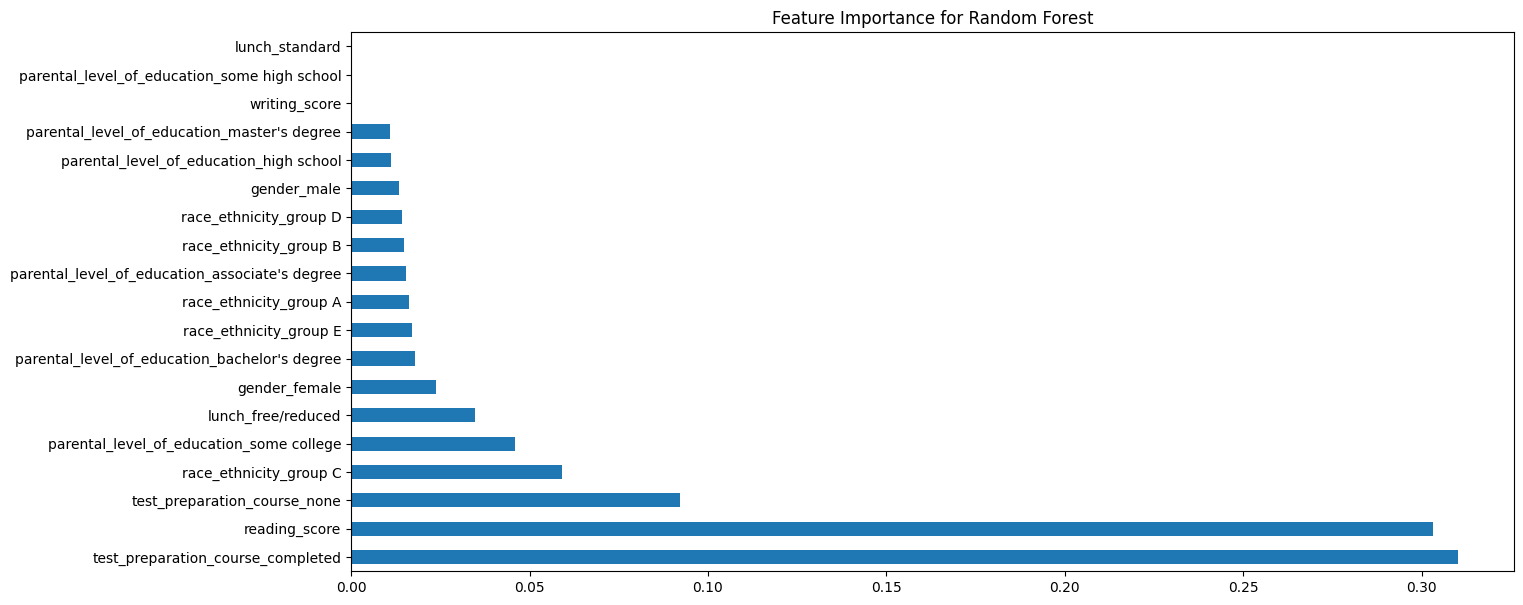

In [76]:
plt.figure(figsize = (15,7))
feat_importances = pd.Series(model1.feature_importances_, index=data_encoded.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance for Random Forest')
plt.show()

In [81]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

model(dt, X_train, y_train, X_test, y_test)



DecisionTreeRegressor() Mean Abs Error : 6.915 
 			 Root Mean Square Error : 6.877302964858107 
 			 r2_score : 0.6847711309680407 
 			


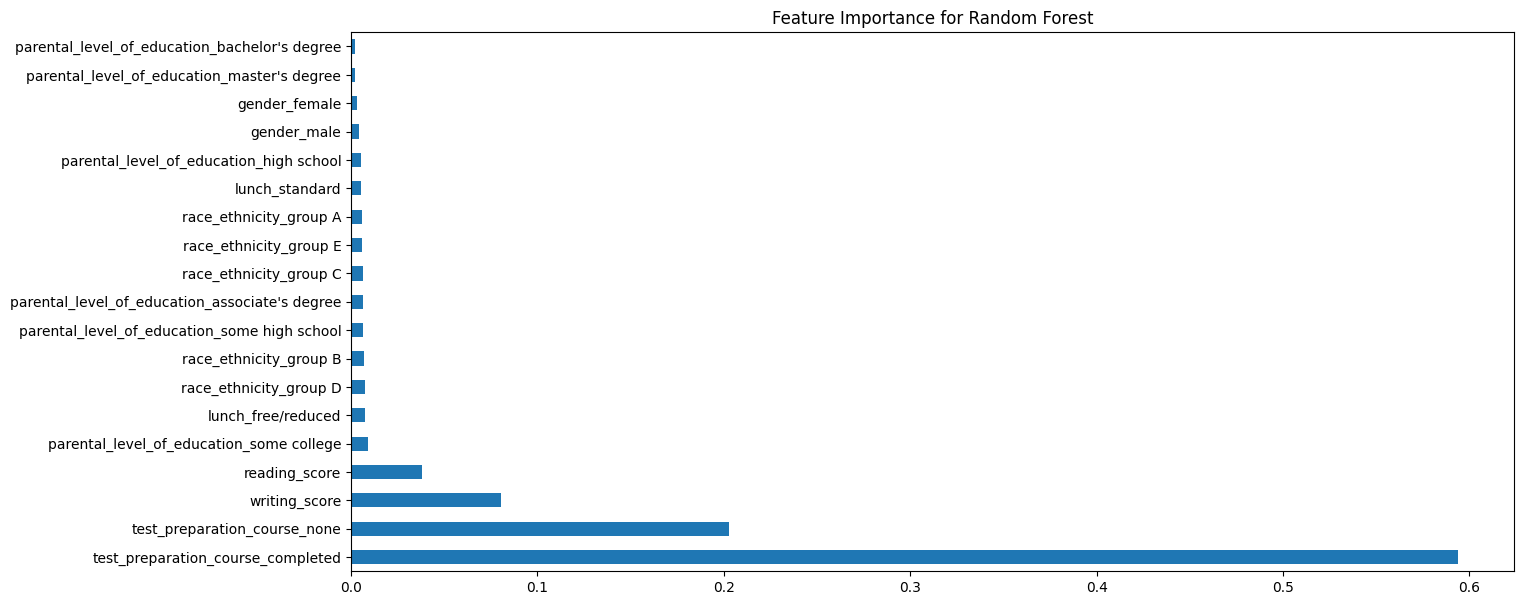

In [82]:
plt.figure(figsize = (15,7))
feat_importances = pd.Series(dt.feature_importances_, index=data_encoded.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance for Random Forest')
plt.show()

In [94]:
from sklearn.svm import SVR

model_SVM = SVR(kernel='linear')

model_SVM.fit(X_train, y_train)

prediction_SVM = model_SVM.predict(X_test)
     

print('SVM MAE:', metrics.mean_absolute_error(y_test,prediction_SVM))
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_SVM)))
print('SVM  R2:',r2_score(y_test, prediction_SVM))

SVM MAE: 4.592756389509477
SVM RMSE: 5.796303039873068
SVM  R2: 0.8650554587922404


In [86]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()

}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2228
- Mean Absolute Error: 4.1770
- R2 Score: 0.8786
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7610
- Mean Absolute Error: 4.5591
- R2 Score: 0.8667


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5053
- Mean Absolute Error: 5.1069
- R2 Score: 0.8116
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8618
- Mean Absolute Error: 5.5280
- R2 Score: 0.8109


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2155
- Mean Absolute Error: 4.1723
- R2 Score: 0.8789
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7750
- Mean Absolute Error: 4.5504
- R2 Score: 0.8660


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 2.9224
- Mean Absolute Error: 2.3002
- R2 Score: 0.9620
-----------------------

In [96]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg = lin_model.fit(X_train, y_train)
prediction_Linear_reg = linear_reg.predict(X_test)


In [97]:
print('linear_reg  MAE:', metrics.mean_absolute_error(y_test,prediction_Linear_reg))
print('linear_reg  RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_Linear_reg)))
print('linear_reg   R2:',r2_score(y_test, prediction_Linear_reg))

linear_reg  MAE: 4.5590625
linear_reg  RMSE: 5.761040691034043
linear_reg   R2: 0.8666923598244205


<Axes: xlabel='math_score'>

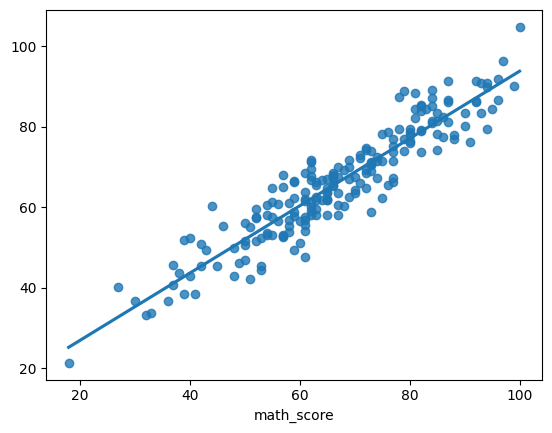

In [104]:
sns.regplot(x=y_test,y=prediction_Linear_reg,ci=None)

In [101]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':prediction_Linear_reg,'Difference':y_test-prediction_Linear_reg})
pred_df

,Actual Value,Predicted Value,Difference
228,68,69.1875,-1.1875
610,69,62.5625,6.4375
285,81,84.5000,-3.5000
870,59,57.8125,1.1875
54,71,72.3125,-1.3125
...,...,...,...
477,80,76.5625,3.4375
55,33,33.6875,-0.6875
198,45,45.3125,-0.3125
527,36,36.7500,-0.7500
